# DS4400 HW3

Christopher Dilger
Due: 11/16/2018

Please find a version of this document at https://github.com/cdilga/DS4400
For any access queries please email [c.dilger1@gmail.com](c.dilger1@gmail.com)

## Problem 1 [Random Forest classifier]

 1. Use an existing package to train a Random Forest classifier on the training set. Report accuracy, error, precision, and recall on both training and testing sets.

 2. Implement your own Random Forest algorithm. The Random Forest training procedure takes as input the training dataset, the number of trees, and the number of features m ≤ d considered at every split (d is the total number of features in the dataset). 1

 3. Vary the number of features m selected at random at each split. Consider m = d, m = d/2, and m = √ d. Report accuracy, error, precision, and recall on the training and testing set.

 4. Fix the number of features m = √d. Compare your implementation with the package results for different number of trees (10, 50, and 100).

In [16]:
import pandas as pd
import numpy as np
import sklearn as sk
import sklearn.ensemble
import sklearn.metrics
import sklearn.feature_selection
import scipy.stats
headers = []
with open('headers.txt') as f:
    for line in f:
        headers.append(line.split(' ')[0])
    
df = pd.read_csv('spambase.txt', header = None, names = headers, index_col = False)

class o():
    pass


def split(percentage, dataframe):
    train = o()
    test = o()
    train.data = df.sample(frac=percentage,random_state=200)
    test.data = df.drop(train.data.index)

    train.x = train.data.iloc[:,0:57]
    train.y = train.data['spam']

    test.x = test.data.iloc[:,0:57]
    test.y = test.data['spam']
    return (test, train)

test, train = split(.75, df)

rfc = sk.ensemble.RandomForestClassifier()

rfc.fit(train.x, train.y)

cm = sk.metrics.confusion_matrix(test.y, rfc.predict(test.x))
display(cm)
tn, fp, fn, tp = cm.ravel()



class Node:
    def __init__(self, attribute, cutoff, nodes = []):
        '''
        '''
        self.nodes = nodes
        self.attribute = attribute
        
    def visit(self):
        return leftnode.visit()
    
    def addNode(self, node):
        pass
        
class ID3:
    def __init__(self, trees, features):
        self.trees = trees
        self.features = features
        
    def _id3(x, y):
        #if all are positive, return a new leaf with class 1
        #if all are negative, return a new leaf with class -1
        #if x has 0 columns, then return a new leaf with class average?
        
        #pick the attribute that best classifies examples
        #create node with that attribute. 
        
        self._tree = Node()
        
    def fit(x, y):
        self._defaultLabel = scipy.stats.mode(y)
        
    
    def predict(x):
        self._tree
        #This will go down the tree and make decisions at each node, and take the left and right option

#IG sklearn.feature_selection

array([[667,  29],
       [ 38, 416]], dtype=int64)

## Problem 2 [AdaBoost classifier]

Use the SPAMBASE dataset for this problem. Split the original data into 75% for training and 25% for
testing (chosen at random).
1. Use an existing package to train an AdaBoost algorithm with 50 base classifiers. Use a decision tree as the base classification model. Report accuracy, error, precision, and recall on both training and testing sets.
2. Change the base classifier to logistic regression, but keep the number of base learners at 50. Report accuracy, error, precision, and recall on both training and testing set.
3. Compare the performance of the AdaBoost classifier with different number of base learners (10, 50, and 100).
4. Compare AdaBoost with Random Forest for the same number of base learners (consider 10, 50, and 100).


Decision Tree Approach


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Now compute with Logistic Classifier:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

        precision    recall  accuracy     error
values                                         
10       0.902935  0.881057  0.915652  0.084348
50       0.926503  0.916300  0.938261  0.061739
100      0.921225  0.927313  0.940000  0.060000
        precision    recall  accuracy     error
values                                         
10       0.939462  0.922907  0.946087  0.053913
50       0.952915  0.936123  0.956522  0.043478
100      0.961712  0.940529  0.961739  0.038261


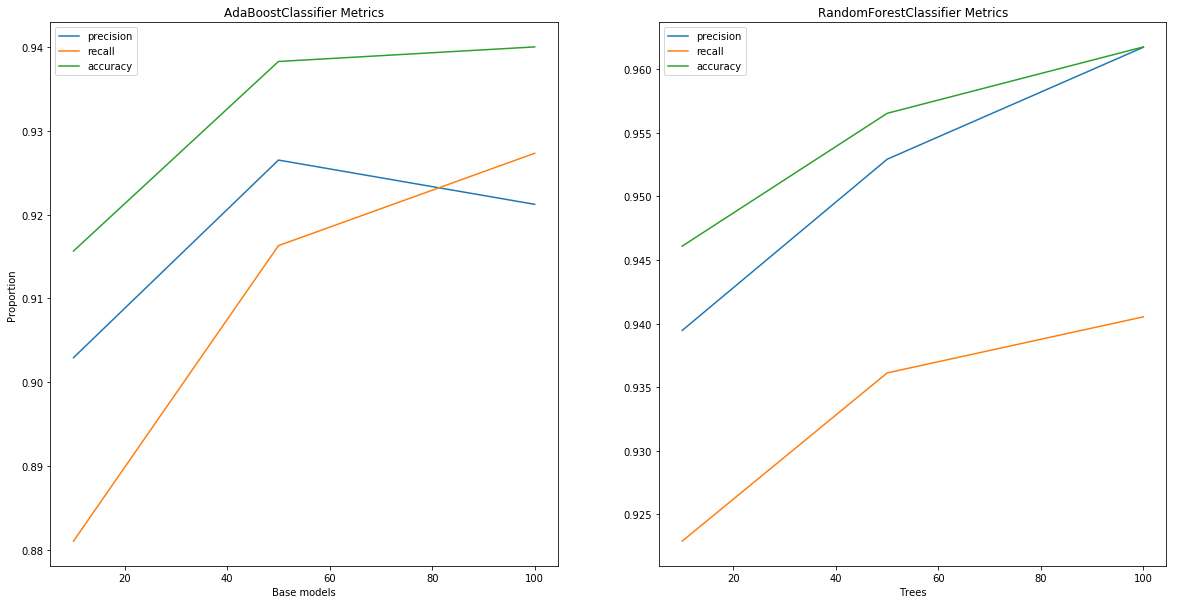

In [109]:
test, train = split(.75, df)

from IPython.display import display, Math
import sklearn.linear_model
import matplotlib.pyplot as plt

def metrics(cm):
    tn, fp, fn, tp = cm.ravel()
    return (tp/(tp+fp), tp/(tp+fn), (tp+tn)/(np.sum(cm.ravel())), 1-(tp+tn)/(np.sum(cm.ravel())))

def dispMetrics(cm, note = ''):
    '''Show accuracy, error, precision, and recall'''
    
    precision, recall, accuracy, error = metrics(cm)
    
    
    note = note + r'\\' if note != '' else ''
    display(Math(r'{}Accuracy={:.4f} \ \ \epsilon={:.4f} \\ Precision={:.4f} \ \ Recall={:.4f}'.format(note, accuracy, error, precision, recall)))

def abc(n, classifier, name):
    abc = sklearn.ensemble.AdaBoostClassifier(classifier, n_estimators=n)
    abc.fit(train.x, train.y)


    cm = sk.metrics.confusion_matrix(train.y, abc.predict(train.x))
    dispMetrics(cm, '({}) Train Set: '.format(name))
    cm = sk.metrics.confusion_matrix(test.y, abc.predict(test.x))
    dispMetrics(cm, '({}) Test Set: '.format(name))

print('Decision Tree Approach')
abc(50,sklearn.tree.DecisionTreeClassifier(max_depth=1), 'Decision Tree Base')
print('Now compute with Logistic Classifier:')

abc(50,sklearn.linear_model.LogisticRegression(), 'Logistic Regression Base')

def gen(x, classifier):
    x=x['values']
    model = classifier(n_estimators=x)
    model.fit(train.x, train.y)
    cm = sk.metrics.confusion_matrix(test.y, model.predict(test.x))
    return metrics(cm)

def abcGen(x):
    return gen(x, sklearn.ensemble.AdaBoostClassifier)

def rfcGen(x):
    return gen(x, sklearn.ensemble.RandomForestClassifier)

def validator(gen):
    acc = pd.DataFrame([10, 50, 100], columns = ['values'])
    acc[['precision', 'recall', 'accuracy', 'error']] = acc.apply(gen, axis=1, result_type="expand")
    acc = acc.set_index('values')
    print(acc)

    #acc.iloc[:,0:3].plot.line()
    return acc

abcResult = validator(abcGen)
rfcResult = validator(rfcGen)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.plot(abcResult.iloc[:,:3])
ax1.set_title('AdaBoostClassifier Metrics')
ax1.set_xlabel('Base models')
ax1.set_ylabel('Proportion')
ax1.legend(abcResult)
ax2.plot(rfcResult.iloc[:,:3])
ax2.set_title('RandomForestClassifier Metrics')
ax2.set_xlabel('Trees')
ax2.legend(rfcResult)

## Problem 3 [Neural Networks]
Use the MNIST dataset for this problem. The dataset is already split into training and testing data.
For Neural Network implementation, you can use existing packages, such as Keras:
https://keras.io/.
1. Pick 3 configurations of Feed-Forward Neural Networks and describe for each: (1) number of layers; (2) number of hidden units on each layer; (3) activation functions.
2. Train models for all 3 architectures. Report performance metrics (loss function, accuracy, and error) on both training and testing data.
3. Pick 3 configurations of Convolutional Neural Networks and describe for each: (1) number of layers; (2) layer type (convolution, max pooling, fully connected) (3) filter size for convolution and max pooling layer; (4) number of hidden units on each layer; (5) activation functions.
4. Train models for all 3 architectures. Report performance metrics (loss function, accuracy, error) on both training and testing data.
5. Compare performance of Feed-Forward and Convolutional Neural Networks for this classification task.


In [143]:
import pickle, gzip
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

with gzip.open('mnist.pkl.gz', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    train_set, valid_set, test_set = u.load()
    
#print(train_set, valid_set, test_set)
#plt.imshow(train_set[0][0].reshape(28,28))
#print(train_set[1][0])

model = Sequential()

def error(y_true, y_pred):
    return 1 - keras.metrics.categorical_accuracy(y_true, y_pred)


model.add(Dense(units=10, activation='relu', input_dim=784))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy', error])

model.fit(train_set[0], keras.utils.to_categorical(train_set[1], num_classes=10), epochs=5, batch_size=32)
score = model.evaluate(train_set[0], keras.utils.to_categorical(train_set[1], num_classes=10), batch_size=128)

results = pd.DataFrame([score], columns = model.metrics_names + ['desc'])
print(r'')
scoretest = model.evaluate(test_set[0], keras.utils.to_categorical(test_set[1], num_classes=10), batch_size=128)
results.loc[results.shape[0]] = scoretest



model2 = Sequential()
model2.add(Dense(units=64, activation='relu', input_dim=784))
model2.add(Dense(units=10, activation='softmax'))
model2.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy', error])
model2.fit(train_set[0], keras.utils.to_categorical(train_set[1], num_classes=10), epochs=5, batch_size=32)
score = model2.evaluate(train_set[0], keras.utils.to_categorical(train_set[1], num_classes=10), batch_size=128)
results.loc[results.shape[0]] = score
score = model2.evaluate(test_set[0], keras.utils.to_categorical(test_set[1], num_classes=10), batch_size=128)
results.loc[results.shape[0]] = score


model3 = Sequential()
model3.add(Dense(units=64, activation='sigmoid', input_dim=784))
model3.add(Dense(units=10, activation='softmax'))
model3.compile(loss='mse',
              optimizer='rmsprop',
              metrics=['accuracy', error])
model3.fit(train_set[0], keras.utils.to_categorical(train_set[1], num_classes=10), epochs=5, batch_size=32)
score = model3.evaluate(train_set[0], keras.utils.to_categorical(train_set[1], num_classes=10), batch_size=128)
results.loc[results.shape[0]] = score
score = model3.evaluate(test_set[0], keras.utils.to_categorical(test_set[1], num_classes=10), batch_size=128)
results.loc[results.shape[0]] = score

print(results)

Epoch 1/5
50000/50000 [==============================] - 5s 97us/step - loss: 0.5365 - acc: 0.8521 - error: 0.1479
Epoch 2/5
50000/50000 [==============================] - 6s 125us/step - loss: 0.3174 - acc: 0.9108 - error: 0.0892
Epoch 3/5
50000/50000 [==============================] - 9s 178us/step - loss: 0.2880 - acc: 0.9177 - error: 0.0823 4s  - ETA: 0s - loss: 0.2870 - acc: 0.9178 - error: - ETA: 0s - loss: 0.2874 - acc: 0.9178 - erro
Epoch 4/5
50000/50000 [==============================] - 10s 204us/step - loss: 0.2733 - acc: 0.9232 - error: 0.0768
Epoch 5/5
10000/10000 [==============================] - 0s 14us/step
Epoch 1/5
50000/50000 [==============================] - 5s 107us/step - loss: 0.3207 - acc: 0.9106 - error: 0.0894
Epoch 2/5
50000/50000 [==============================] - 5s 109us/step - loss: 0.1645 - acc: 0.9519 - error: 0.0481
Epoch 3/5
50000/50000 [==============================] - 5s 97us/step - loss: 0.1256 - acc: 0.9634 - error: 0.0366
Epoch 4/5
50000/50000